In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import yfinance as yf
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

Import IHSG Data

In [6]:
start_date = "2020-01-01"
end_date = pd.to_datetime("today").strftime("%Y-%m-%d")

df = yf.Ticker("^JKSE")
df = df.history(start=start_date, end=end_date)
del df['Dividends']
del df['Stock Splits']
forecastData = df.copy()
df.tail(20)

,Open,High,Low,Close,Volume
Date,,,,,
2025-10-10 00:00:00+07:00,8259.075195,8270.332031,8194.046875,8257.859375,366345900
2025-10-13 00:00:00+07:00,8169.648926,8288.279297,8133.626953,8227.202148,366939200
2025-10-14 00:00:00+07:00,8269.480469,8284.910156,7974.029785,8066.521973,440487100
2025-10-15 00:00:00+07:00,8107.298828,8132.521973,7936.371094,8051.174805,329138800
2025-10-16 00:00:00+07:00,8064.679199,8148.044922,8030.776855,8124.756836,246641300
2025-10-17 00:00:00+07:00,8132.747070,8140.597168,7854.307129,7915.655762,353739000
2025-10-20 00:00:00+07:00,7988.448242,8117.269043,7937.384766,8088.978027,307599100
2025-10-21 00:00:00+07:00,8165.691895,8238.083984,8161.193848,8238.083984,281761500
2025-10-22 00:00:00+07:00,8235.699219,8261.843750,8141.985840,8152.553223,275367500


In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,1411.000000,1411.000000,1411.000000,1411.000000,1.411000e+03
mean,6625.227878,6661.936070,6581.623088,6621.420358,1.730588e+08
std,806.524961,804.163896,807.686216,805.242704,7.541218e+07
min,3937.632080,4123.562012,3911.716064,3937.632080,0.000000e+00
25%,6146.203613,6169.862549,6105.593994,6141.441406,1.320572e+08
50%,6830.061035,6865.611816,6796.632812,6827.174805,1.653060e+08
75%,7134.855469,7177.380859,7089.839600,7134.449951,2.087138e+08
max,8354.679688,8362.916016,8289.890625,8337.057617,6.150719e+08


Close & Open IHSG Visualitation History

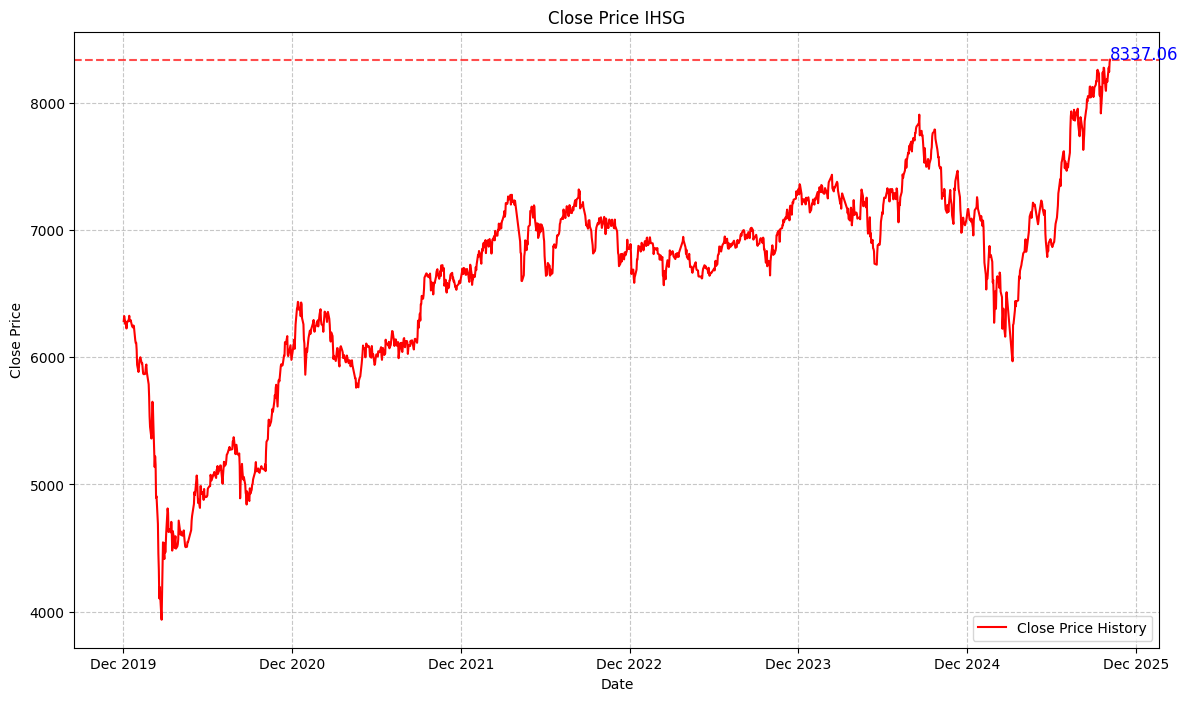

In [8]:
# Close price visualitation

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x=df.index, y='Close', label='Close Price History', color='red')

max_price = df['Close'].max()
max_price_date = df['Close'].idxmax()

# Annotate the hight price
plt.annotate(f'{max_price:.2f}',
             xy=(max_price_date, max_price),
             xytext=(max_price_date, max_price + 2),
             fontsize=12, color='blue')

plt.axhline(max_price, linestyle='--', color='red', alpha=0.7)
plt.title('Close Price IHSG')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

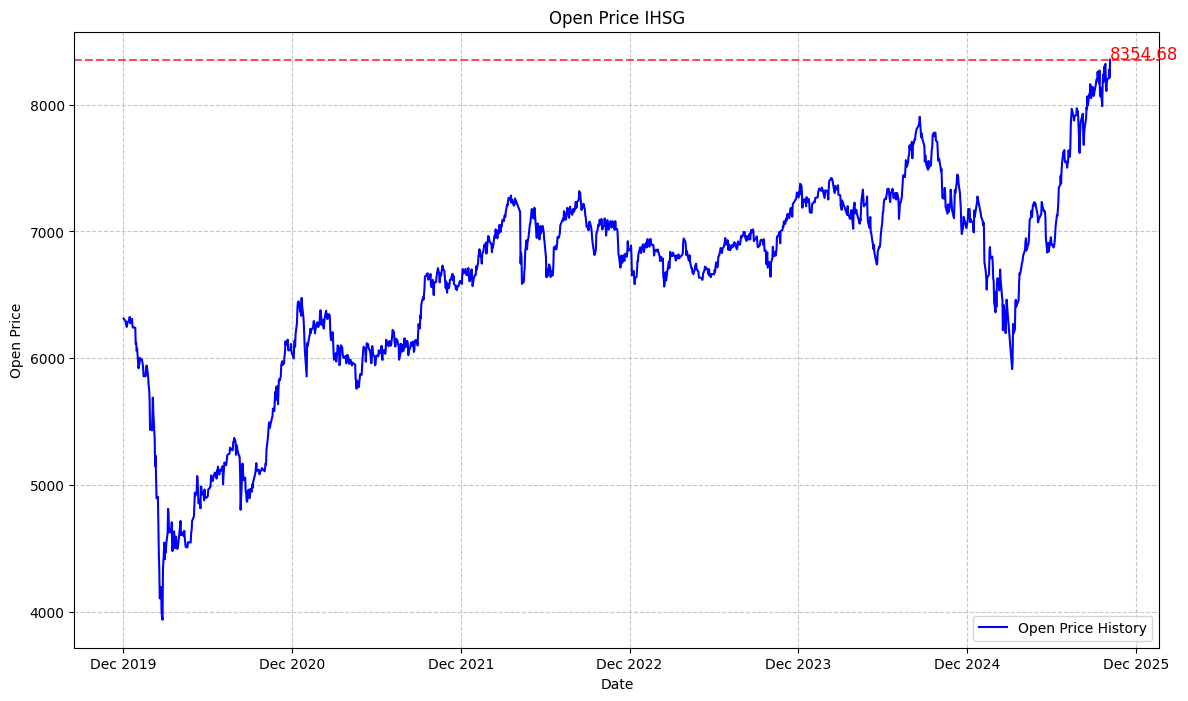

In [9]:
# Open price visualitation

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x=df.index, y='Open', label='Open Price History', color='blue')

max_price = df['Open'].max()
max_price_date = df['Open'].idxmax()

# Annotate the hight price
plt.annotate(f'{max_price:.2f}',
             xy=(max_price_date, max_price),
             xytext=(max_price_date, max_price + 2),
             fontsize=12, color='red')

plt.axhline(max_price, linestyle='--', color='red', alpha=0.7)
plt.title('Open Price IHSG')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
scaled_data

array([[0.53323984],
       [0.54230574],
       [0.52728947],
       ...,
       [0.97837298],
       [0.9957878 ],
       [1.        ]])

In [11]:
def create_sequences(df, sequence_length):
    sequences = []
    labels = []
    for i in range(len(df) - sequence_length):
        sequences.append(df[i:i + sequence_length])
        labels.append(df[i + sequence_length, 0])
    return np.array(sequences), np.array(labels)

In [12]:
sequence_length = 30

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

Data Modelling

In [13]:
from sklearn.linear_model import LinearRegression

# Reshape data for LinearRegression (transform from 3D into 2D)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Initialitation and training model
model = LinearRegression(n_jobs=-1, positive=True)
model.fit(X_train_reshaped, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,True


In [14]:
# Make preidctions
predictions = model.predict(X_test_reshaped)
predictions = predictions.reshape(-1, 1)

# Transform back predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics using original scale date
mse = mean_squared_error(y_test_scaled, predictions)
rmse = root_mean_squared_error(y_test_scaled, predictions)
r2 = r2_score(y_test_scaled, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 7296.88
Root Mean Squared Error: 85.42
R2 Score: 0.9758


In [15]:
# Get last 30 days of data and prepare for prediction
last_30_days = df['Close'][-sequence_length:].values.reshape(-1, 1)
last_30_days_scaled = scaler.transform(last_30_days)

# Reshape data properly for prediction
X_predict = last_30_days_scaled.reshape(1, sequence_length)  # Reshape to 2D array

# Make prediction
predicted_price = model.predict(X_predict)

# Inverse transform the prediction
predicted_price = predicted_price.reshape(-1, 1)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted IHSG Price: {predicted_price[0][0]:.2f}")

Predicted IHSG Price: 8332.06


In [16]:
future_days = 30

# Get and scale last 30 days data
last_30_days = df['Close'][-sequence_length:].values.reshape(-1, 1)
last_30_days_scaled = scaler.transform(last_30_days)
future_predictions = []

# initial reshape for first prediction
current_sequence = last_30_days_scaled.reshape(1, -1)

for _ in range(future_days):
    predicted_price = model.predict(current_sequence)

    # Inverse transform and store prediction
    predicted_price = predicted_price.reshape(-1, 1)
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)
    future_predictions.append(predicted_price_unscaled[0, 0])

    # update sequence for next prediction
    current_sequence = np.roll(current_sequence, -1)
    current_sequence[0, -1] = predicted_price[0, 0]

# create future dates
future_dates = pd.date_range(start=df.index[-1], periods=future_days+1, freq='D')[1:]

future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price IHSG': future_predictions})

Data Visualitation for IHSG Predicts

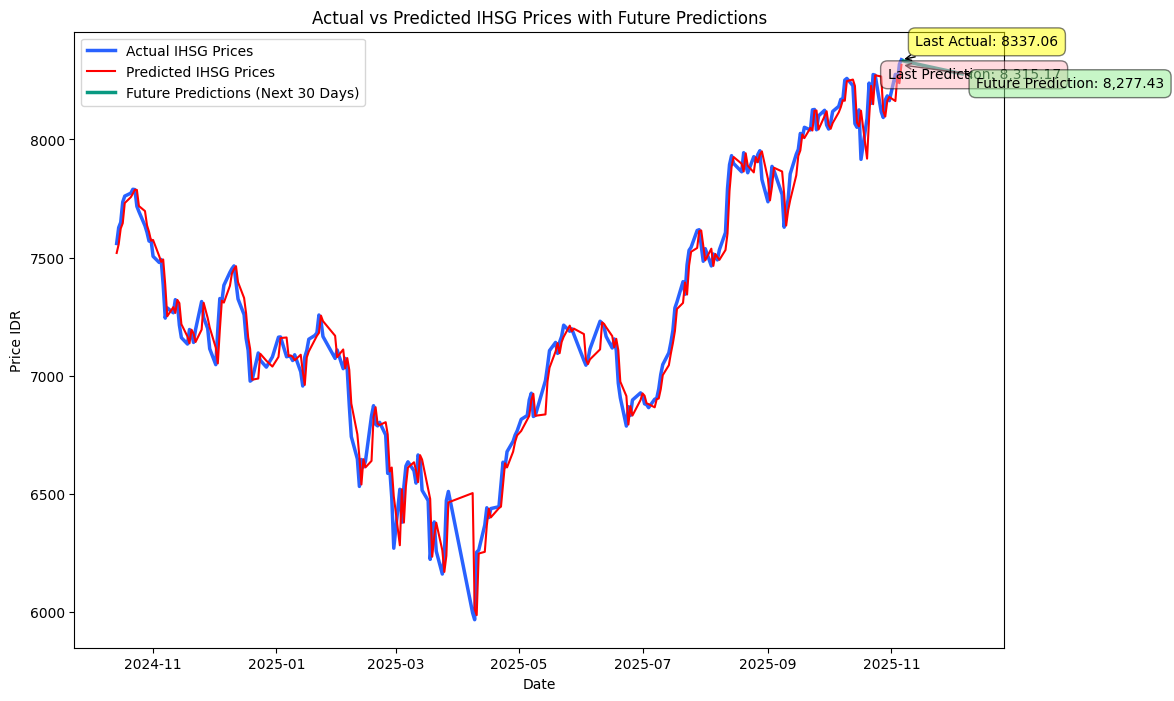

In [17]:
plt.figure(figsize=(12, 8))

plt.plot(df.index[-len(y_test_scaled):], y_test_scaled, label='Actual IHSG Prices', color='#2962ff', linewidth=2.5)
plt.plot(df.index[-len(y_test_scaled):], predictions, label='Predicted IHSG Prices', color='red', linewidth=1.5)
plt.plot(future_dates, future_predictions, label='Future Predictions (Next 30 Days)', color='#089981', linewidth=2.5)

# Annotate for last actual IHSG
last_actual = y_test_scaled[-1][0]
plt.annotate(f'Last Actual: {last_actual:.2f}',
             xy=(df.index[-len(y_test_scaled):][-1], last_actual),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Annotate for last predict IHSG
last_predicion = predictions[-1][0]
plt.annotate(f'Last Prediction: {last_predicion:,.2f}',
             xy=(df.index[-len(y_test_scaled):][-1], last_predicion),
             xytext=(-10, -10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='lightpink', alpha=0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Annotation for last predict in the future
last_future = future_predictions[-1]
plt.annotate(f'Future Prediction: {last_future:,.2f}',
             xy=(future_dates[-1], last_future),
             xytext=(10, -10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='lightgreen', alpha=0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title('Actual vs Predicted IHSG Prices with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price IDR')
plt.legend()
plt.show()

In [18]:
future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price_IHSG': future_predictions
})

future_predictions_df.tail()

,Date,Predicted_Price_IHSG
25,2025-12-02 00:00:00+07:00,8284.736566
26,2025-12-03 00:00:00+07:00,8282.905070
27,2025-12-04 00:00:00+07:00,8281.076964
28,2025-12-05 00:00:00+07:00,8279.252244
29,2025-12-06 00:00:00+07:00,8277.430902


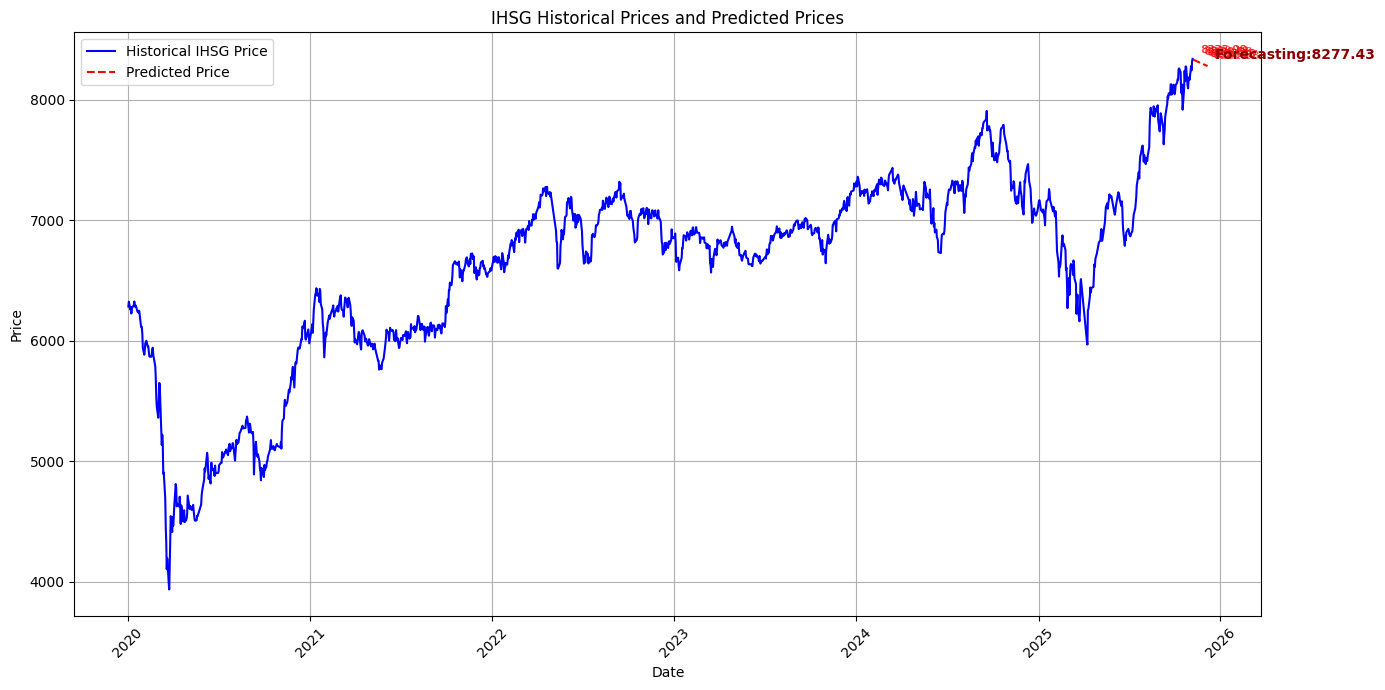

In [19]:
# Visualitation result

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical IHSG Price', color='blue')
plt.plot(future_predictions_df['Date'], future_predictions_df['Predicted_Price_IHSG'],
         label='Predicted Price', color='red', linestyle='--')
plt.title('IHSG Historical Prices and Predicted Prices')

# add annotations for everyh 5th predicted value to avoid overcrowding
step_size = max(1, len(future_predictions_df) // 10)
for i in range(0, len(future_predictions_df), step_size):
    date = future_predictions_df['Date'].iloc[i]
    price = future_predictions_df['Predicted_Price_IHSG'].iloc[i]
    plt.annotate(f'{price:.2f}',
                 xy=(date, price),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=8,
                 color='red',
                 alpha=0.7)
    
# add annotation for the last predicted value
last_date = future_predictions_df['Date'].iloc[-1]
last_price = future_predictions_df['Predicted_Price_IHSG'].iloc[-1]
plt.annotate(f'Forecasting:{last_price:.2f}',
              xy=(last_date, last_price),
              xytext=(5, 5),
              textcoords='offset points',
              fontsize=10,
              color='darkred',
              weight='bold')

plt.title('IHSG Historical Prices and Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# calculate percentage change from the last actual close price
last_actual_price = df['Close'].iloc[-1]
percentage_change = ((future_predictions_df['Predicted_Price_IHSG'].iloc[-1] - last_actual_price) / last_actual_price) * 100

# Determine profit or loss
status = "profit" if percentage_change > 0 else "loss"

# print the percentage prediction
print(f"Percentage prediction for 30 days is: {status} {abs(percentage_change):.2f}%")

Percentage prediction for 30 days is: loss 0.72%


Random forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(n_estimators=100, 
                                 random_state=42, 
                                 max_depth=10,
                                 min_samples_leaf=2,
                                 min_samples_split=5,
                                 n_jobs=-1)

# train the model
rf_model.fit(X_train_reshaped, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_reshaped)
rf_predictions = rf_predictions.reshape(-1, 1)

# inverse transform predictions and actual values
rf_predictions_original = scaler.inverse_transform(rf_predictions)

# Metrics
rf_mse = mean_squared_error(y_test_scaled, rf_predictions_original)
rf_rmse = root_mean_squared_error(y_test_scaled, rf_predictions_original)
rf_r2 = r2_score(y_test_scaled, rf_predictions_original)

print("=== RandomForest Results ===")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.4f}")

=== RandomForest Results ===
MSE: 62714.36
RMSE: 250.43
R² Score: 0.7924


Hyperparameter tuning

In [22]:
# GridSearch untuk tuning hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_reshaped, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Use best model
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.011999705755831744


In [23]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100,
                         learning_rate=0.1,
                         max_depth=5,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         random_state=42,
                         n_jobs=-1)

xgb_model.fit(X_train_reshaped, y_train)

# make predictions
xgb_predictions = xgb_model.predict(X_test_reshaped)
xgb_predictions = xgb_predictions.reshape(-1, 1)

xgb_predictions_original = scaler.inverse_transform(xgb_predictions)

# Metrics
xgb_mse = mean_squared_error(y_test_scaled, xgb_predictions_original)
xgb_rmse = root_mean_squared_error(y_test_scaled, xgb_predictions_original)
xgb_r2 = r2_score(y_test_scaled, xgb_predictions_original)

print("=== XGBoost Results ===")
print(f"MSE: {xgb_mse:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R² Score: {xgb_r2:.4f}")

=== XGBoost Results ===
MSE: 76709.27
RMSE: 276.96
R² Score: 0.7461


In [24]:
param_grid_xgb = {
    'n_estimators': [100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

grid_search_xgb = GridSearchCV(
    xgb.XGBRegressor(random_state=42, n_jobs=-1),
    param_grid_xgb,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train_reshaped, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Use best model
best_xgb_model = grid_search_xgb.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.011999705755831744


In [25]:
future_days = 30

# Get and scale last 30 days data
last_30_days = df['Close'][-sequence_length:].values.reshape(-1, 1)
last_30_days_scaled = scaler.transform(last_30_days)
rf_future_predictions = []

# Initial reshape for first prediction
current_sequence = last_30_days_scaled.reshape(1, -1)

for _ in range(future_days):
    # Predict using RandomForest
    predicted_price = rf_model.predict(current_sequence)
    
    # Inverse transform and store prediction
    predicted_price = predicted_price.reshape(-1, 1)
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)
    rf_future_predictions.append(predicted_price_unscaled[0, 0])
    
    # Update sequence for next prediction
    current_sequence = np.roll(current_sequence, -1)
    current_sequence[0, -1] = predicted_price[0, 0]

# Create future dates
future_dates = pd.date_range(start=df.index[-1], periods=future_days+1, freq='D')[1:]

# Create DataFrame
rf_future_df = pd.DataFrame({
    'Date': future_dates,
    'RF_Predicted_Price': rf_future_predictions
})

print(rf_future_df.tail())

                        Date  RF_Predicted_Price
25 2025-12-02 00:00:00+07:00         7581.686279
26 2025-12-03 00:00:00+07:00         7581.686279
27 2025-12-04 00:00:00+07:00         7581.686279
28 2025-12-05 00:00:00+07:00         7581.686279
29 2025-12-06 00:00:00+07:00         7581.686279


In [26]:
future_days = 30

# Get and scale last 30 days data
last_30_days = df['Close'][-sequence_length:].values.reshape(-1, 1)
last_30_days_scaled = scaler.transform(last_30_days)
xgb_future_predictions = []

# Initial reshape for first prediction
current_sequence = last_30_days_scaled.reshape(1, -1)

for _ in range(future_days):
    # Predict using XGBoost
    predicted_price = xgb_model.predict(current_sequence)
    
    # Inverse transform and store prediction
    predicted_price = predicted_price.reshape(-1, 1)
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)
    xgb_future_predictions.append(predicted_price_unscaled[0, 0])
    
    # Update sequence for next prediction
    current_sequence = np.roll(current_sequence, -1)
    current_sequence[0, -1] = predicted_price[0, 0]

# Create future dates
future_dates = pd.date_range(start=df.index[-1], periods=future_days+1, freq='D')[1:]

# Create DataFrame
xgb_future_df = pd.DataFrame({
    'Date': future_dates,
    'XGB_Predicted_Price': xgb_future_predictions
})

print(xgb_future_df.tail())

                        Date  XGB_Predicted_Price
25 2025-12-02 00:00:00+07:00          7545.848145
26 2025-12-03 00:00:00+07:00          7545.848145
27 2025-12-04 00:00:00+07:00          7545.848145
28 2025-12-05 00:00:00+07:00          7545.848145
29 2025-12-06 00:00:00+07:00          7545.848145


Perbandingan Model (LinearRegression vs RandomForest)


=== Model Comparison ===
            Model          MSE       RMSE  R² Score
Linear Regression  7296.884359  85.421803  0.975846
    Random Forest 62714.359236 250.428352  0.792405
          XGBoost 76709.267495 276.964379  0.746080


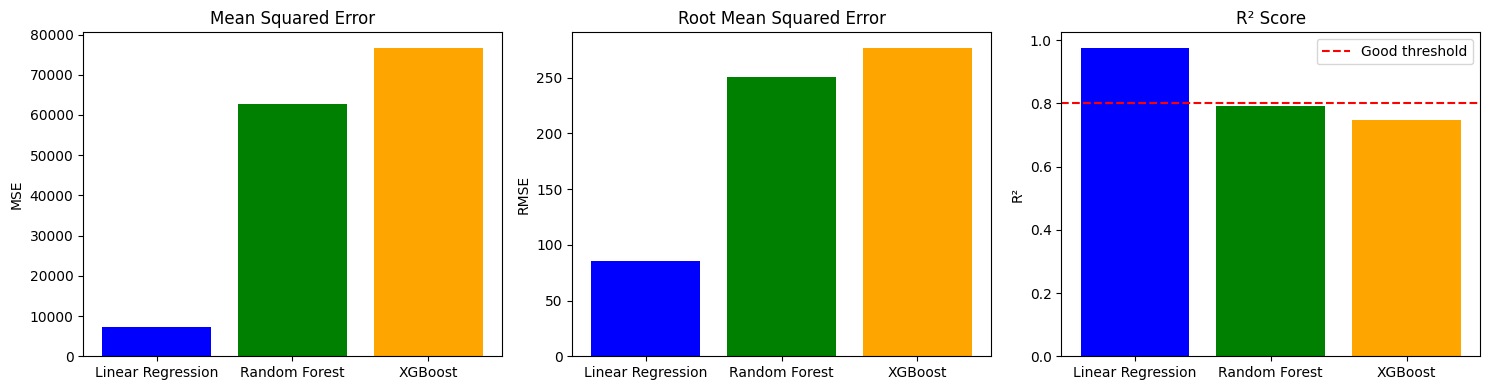

In [27]:
# Comparison DataFrame
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MSE': [mse, rf_mse, xgb_mse],
    'RMSE': [rmse, rf_rmse, xgb_rmse],
    'R² Score': [r2, rf_r2, xgb_r2]
})

print("\n=== Model Comparison ===")
print(comparison.to_string(index=False))

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# MSE
axes[0].bar(comparison['Model'], comparison['MSE'], color=['blue', 'green', 'orange'])
axes[0].set_title('Mean Squared Error')
axes[0].set_ylabel('MSE')

# RMSE
axes[1].bar(comparison['Model'], comparison['RMSE'], color=['blue', 'green', 'orange'])
axes[1].set_title('Root Mean Squared Error')
axes[1].set_ylabel('RMSE')

# R² Score
axes[2].bar(comparison['Model'], comparison['R² Score'], color=['blue', 'green', 'orange'])
axes[2].set_title('R² Score')
axes[2].set_ylabel('R²')
axes[2].axhline(y=0.8, color='red', linestyle='--', label='Good threshold')

plt.tight_layout()
plt.legend()
plt.show()

Visualitation predict on 2 models

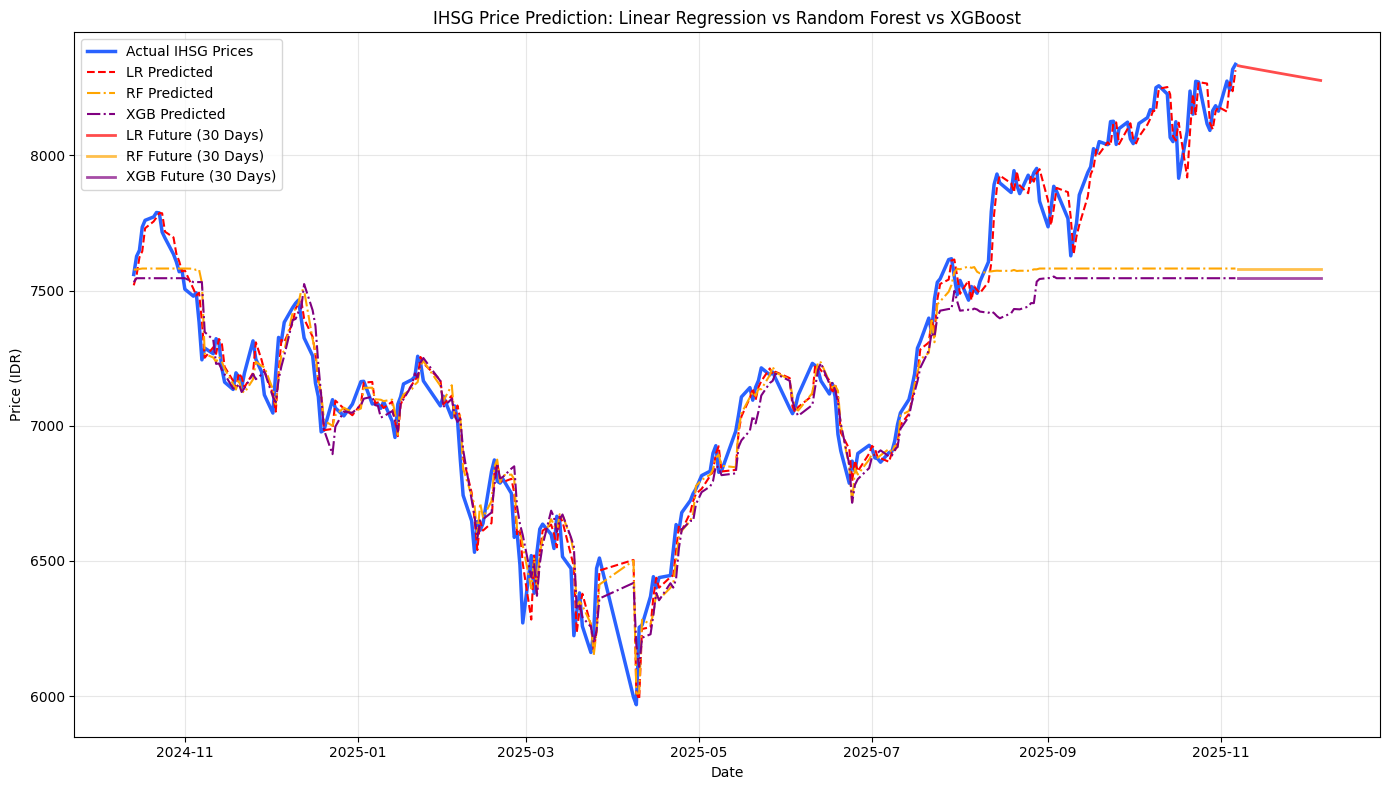

In [28]:
plt.figure(figsize=(14, 8))

# Actual data
plt.plot(df.index[-len(y_test_scaled):], y_test_scaled, 
         label='Actual IHSG Prices', color='#2962ff', linewidth=2.5)

# Linear Regression predictions
plt.plot(df.index[-len(y_test_scaled):], predictions, 
         label='LR Predicted', color='red', linewidth=1.5, linestyle='--')

# RandomForest predictions
plt.plot(df.index[-len(y_test_scaled):], rf_predictions_original, 
         label='RF Predicted', color='orange', linewidth=1.5, linestyle='-.')

# XGBoost predictions
plt.plot(df.index[-len(y_test_scaled):], xgb_predictions_original, 
         label='XGB Predicted', color='purple', linewidth=1.5, linestyle='-.')

# Future predictions - Linear Regression
plt.plot(future_dates, future_predictions, 
         label='LR Future (30 Days)', color='red', linewidth=2, alpha=0.7)

# Future predictions - RandomForest
plt.plot(future_dates, rf_future_predictions, 
         label='RF Future (30 Days)', color='orange', linewidth=2, alpha=0.7)

# Future predictions - XGBoost
plt.plot(future_dates, xgb_future_predictions, 
         label='XGB Future (30 Days)', color='purple', linewidth=2, alpha=0.7)

plt.title('IHSG Price Prediction: Linear Regression vs Random Forest vs XGBoost')
plt.xlabel('Date')
plt.ylabel('Price (IDR)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Feature Importance (RandomForest)

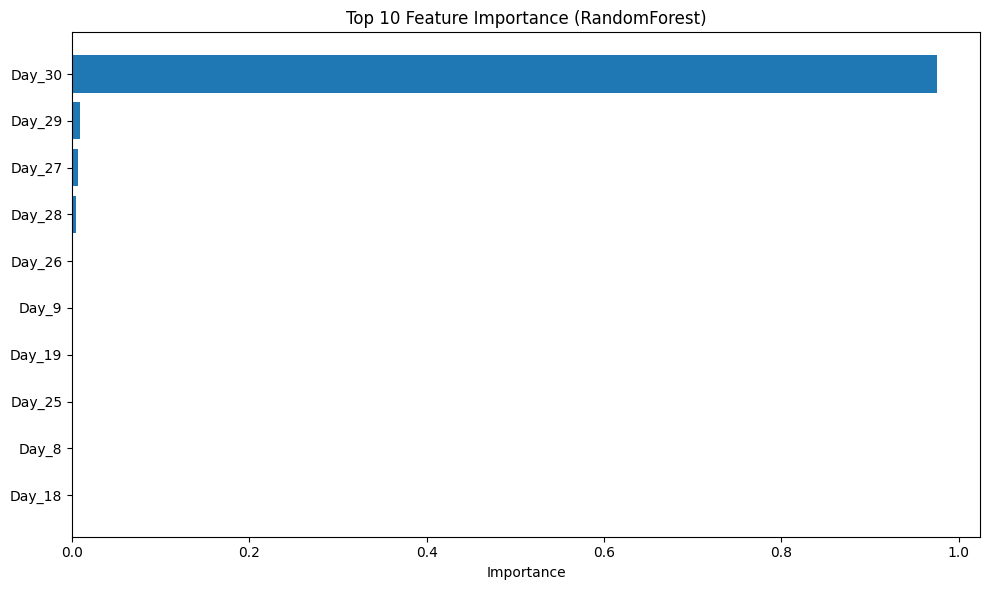


Top 10 Most Important Features:
   Feature  Importance
29  Day_30    0.975248
28  Day_29    0.008987
26  Day_27    0.006793
27  Day_28    0.003986
25  Day_26    0.000495
8    Day_9    0.000380
18  Day_19    0.000339
24  Day_25    0.000324
7    Day_8    0.000270
17  Day_18    0.000258


In [29]:
# Get feature importance
feature_importance = rf_model.feature_importances_
features = [f'Day_{i+1}' for i in range(sequence_length)]

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance (RandomForest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

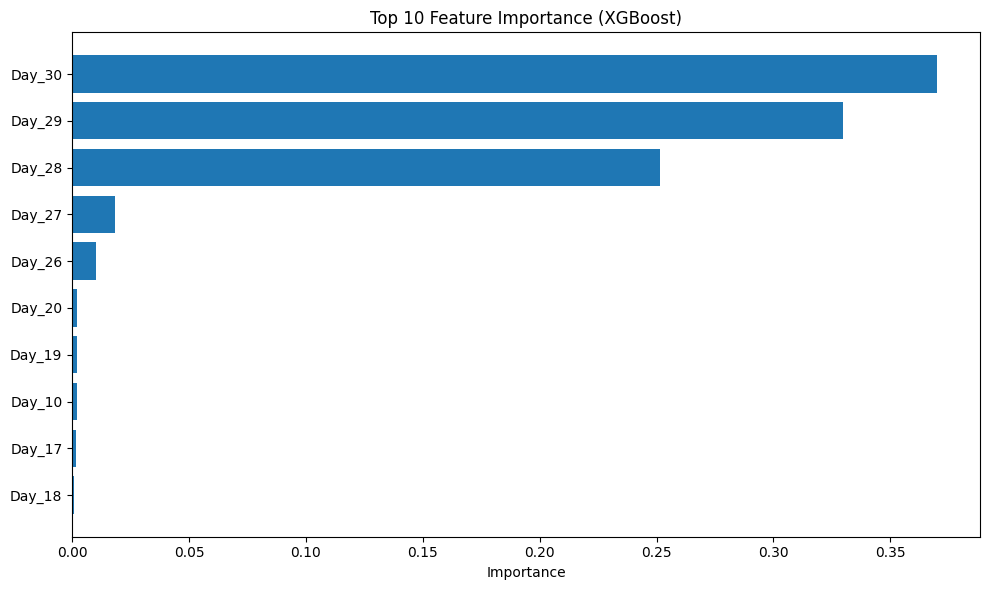


Top 10 Most Important Features:
   Feature  Importance
29  Day_30    0.369873
28  Day_29    0.329634
27  Day_28    0.251505
26  Day_27    0.018430
25  Day_26    0.010234
19  Day_20    0.002145
18  Day_19    0.001987
9   Day_10    0.001894
16  Day_17    0.001484
17  Day_18    0.001007


In [30]:
# Get feature importance
feature_importance = xgb_model.feature_importances_
features = [f'Day_{i+1}' for i in range(sequence_length)]

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance (XGBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

In [31]:
print(future_predictions_df.tail())
print(rf_future_df.tail())
print(xgb_future_df.tail())

                        Date  Predicted_Price_IHSG
25 2025-12-02 00:00:00+07:00           8284.736566
26 2025-12-03 00:00:00+07:00           8282.905070
27 2025-12-04 00:00:00+07:00           8281.076964
28 2025-12-05 00:00:00+07:00           8279.252244
29 2025-12-06 00:00:00+07:00           8277.430902
                        Date  RF_Predicted_Price
25 2025-12-02 00:00:00+07:00         7581.686279
26 2025-12-03 00:00:00+07:00         7581.686279
27 2025-12-04 00:00:00+07:00         7581.686279
28 2025-12-05 00:00:00+07:00         7581.686279
29 2025-12-06 00:00:00+07:00         7581.686279
                        Date  XGB_Predicted_Price
25 2025-12-02 00:00:00+07:00          7545.848145
26 2025-12-03 00:00:00+07:00          7545.848145
27 2025-12-04 00:00:00+07:00          7545.848145
28 2025-12-05 00:00:00+07:00          7545.848145
29 2025-12-06 00:00:00+07:00          7545.848145


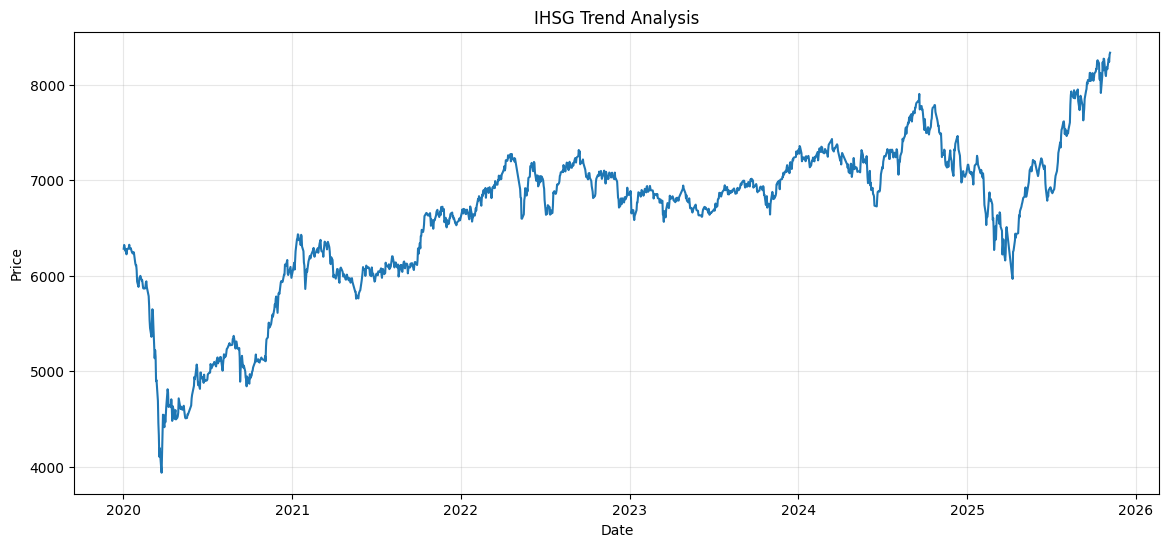

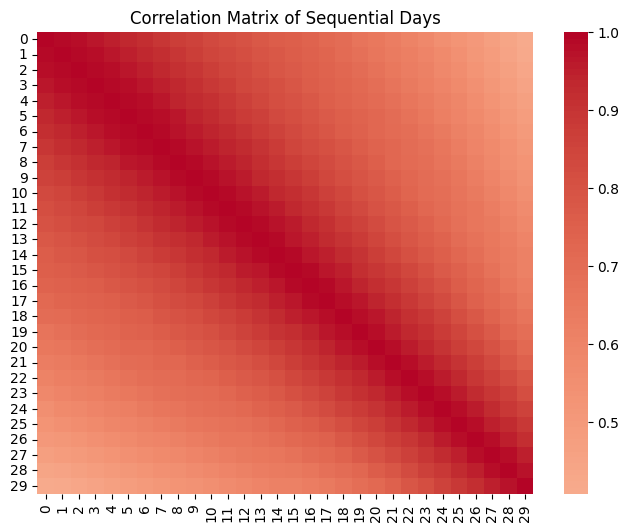

In [32]:
# Cek trend data IHSG
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'])
plt.title('IHSG Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True, alpha=0.3)
plt.show()

# Cek korelasi antar hari
correlation_matrix = pd.DataFrame(X_train_reshaped[:100]).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sequential Days')
plt.show()

In [33]:
# Cek apakah RF overfitting
print("=== OVERFITTING CHECK ===")
print(f"RF Train R²: {rf_model.score(X_train_reshaped, y_train):.4f}")
print(f"RF Test R²:  {rf_r2:.4f}")
print(f"Gap: {rf_model.score(X_train_reshaped, y_train) - rf_r2:.4f}")

print(f"\nLR Train R²: {model.score(X_train_reshaped, y_train):.4f}")
print(f"LR Test R²:  {r2:.4f}")
print(f"Gap: {model.score(X_train_reshaped, y_train) - r2:.4f}")

print(f"\nXGB Train R²: {xgb_model.score(X_train_reshaped, y_train):.4f}")
print(f"XGB Test R²:  {xgb_r2:.4f}")
print(f"Gap: {xgb_model.score(X_train_reshaped, y_train) - xgb_r2:.4f}")

=== OVERFITTING CHECK ===
RF Train R²: 0.9983
RF Test R²:  0.7924
Gap: 0.2059

LR Train R²: 0.9940
LR Test R²:  0.9758
Gap: 0.0181

XGB Train R²: 0.9989
XGB Test R²:  0.7461
Gap: 0.2528
